In [5]:
# %%
import pandas as pd
import numpy as np
import sklearn as skl

data = pd.read_csv("weather_data_extended.csv")
data.head()

,Location,Temperature (°C),Feels Like (°C),Humidity (%),Wind Speed (kph),Cloud Cover (%),Pressure (mb),UV Index,Visibility (km)
0,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
1,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
2,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
3,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16
4,New York,8.3,4.5,40.0,29.9,75,1003.0,2,16


In [6]:
data.describe()
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          800 non-null    object 
 1   Temperature (°C)  800 non-null    float64
 2   Feels Like (°C)   800 non-null    float64
 3   Humidity (%)      798 non-null    float64
 4   Wind Speed (kph)  798 non-null    float64
 5   Cloud Cover (%)   800 non-null    int64  
 6   Pressure (mb)     798 non-null    float64
 7   UV Index          800 non-null    int64  
 8   Visibility (km)   800 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 56.4+ KB


Location            0
Temperature (°C)    0
Feels Like (°C)     0
Humidity (%)        2
Wind Speed (kph)    2
Cloud Cover (%)     0
Pressure (mb)       2
UV Index            0
Visibility (km)     0
dtype: int64

In [7]:
# imputation
# now we deal with the null values by removing and replacing with estimated values

data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 794 entries, 0 to 799
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          794 non-null    object 
 1   Temperature (°C)  794 non-null    float64
 2   Feels Like (°C)   794 non-null    float64
 3   Humidity (%)      794 non-null    float64
 4   Wind Speed (kph)  794 non-null    float64
 5   Cloud Cover (%)   794 non-null    int64  
 6   Pressure (mb)     794 non-null    float64
 7   UV Index          794 non-null    int64  
 8   Visibility (km)   794 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 62.0+ KB


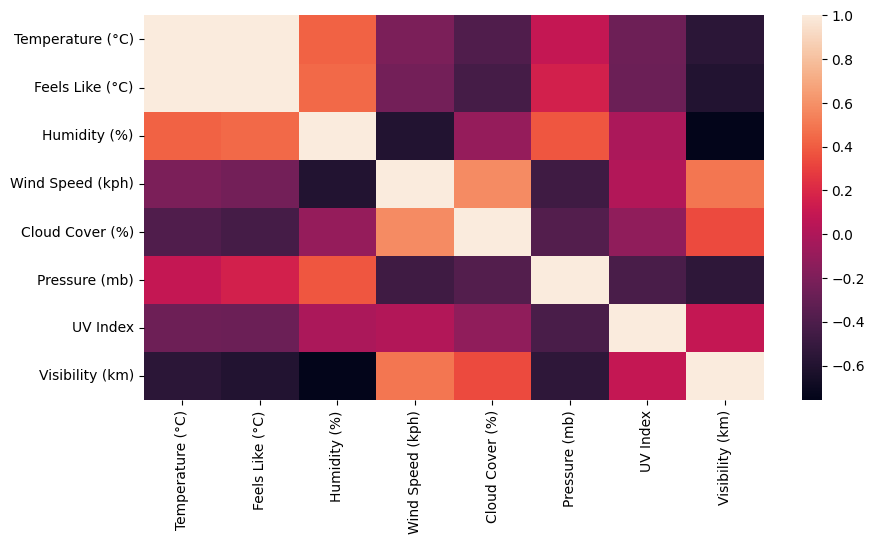

In [10]:
#correlation

import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = data.drop('Location', axis = 1)
corr = numeric_data.corr()
plt.figure(figsize = (10,5))
sns.heatmap(corr, fmt = '.2f')
plt.show()

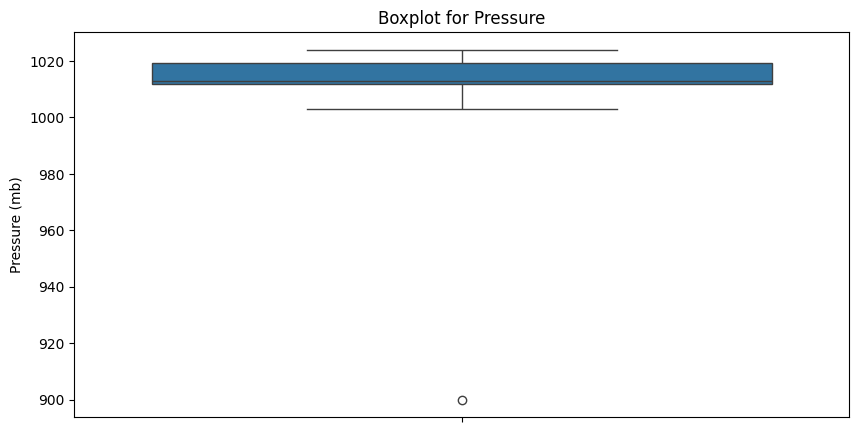

In [15]:
#Outliers

plt.figure(figsize=(10,5))
sns.boxplot(data = data['Pressure (mb)'])
plt.title("Boxplot for Pressure")
plt.show()

In [17]:
from sklearn.preprocessing import RobustScaler

scaled_numericdata = RobustScaler().fit_transform(numeric_data)
print(scaled_numericdata)

[[-0.85555556 -0.98290598 -1.71428571 ... -1.37931034  1.
   6.        ]
 [-0.85555556 -0.98290598 -1.71428571 ... -1.37931034  1.
   6.        ]
 [-0.85555556 -0.98290598 -1.71428571 ... -1.37931034  1.
   6.        ]
 ...
 [ 1.          1.00854701  0.14285714 ... -0.13793103  0.
   0.        ]
 [ 1.          1.00854701  0.14285714 ... -0.13793103  0.
   0.        ]
 [ 1.          1.00854701  0.14285714 ... -0.13793103  0.
   0.        ]]


* Summary *
Loaded Dataset and done a descriptive analysis
EDA - handled missing values, outliers and scaled the data



In [22]:
# Create a linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = numeric_data.drop('Temperature (°C)', axis = 1)
Y = numeric_data['Temperature (°C)']

#scaling feature and label
Xscaled = RobustScaler().fit_transform(X)
#train test split
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xscaled, Y, test_size=0.3, random_state=10)
model = model.fit(Xtrain, Ytrain)

#make predictions and evaluate the model
from sklearn.metrics import r2_score, mean_squared_error
ypred = model.predict(Xtest)
r2 = r2_score(Ytest, ypred)

print("R^2 value = ", r2)

mse = mean_squared_error(Ytest, ypred)

print("Mean Squared Error = ", mse)


R^2 value =  0.9981150675092603
Mean Squared Error =  0.05562009400860349
